In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import seaborn as sns
import json

In [2]:
def selector(data,mod):
    var = list(data.columns)
#     print(var)
    for v in var:
        if('Unnamed:' in v):
            var.remove(v)
    to_rem = ['RunTime','i2','i1','faster_inside','t1','t2','t3','t4','t5','middle_shitfest','perfect_storm2','at_cas_dist_time_avg','perfect_storm','quick_out1','faster_inside','b21','b22','b23','b1','b2','b3','b4','b5','b6','b7','b8','RaceId','Distance','StartPrice','Place','Win','Date','date','Split','Weight','split win','t_mean_place','t_5_time_z','split_z_avg']
    #to_rem = ['RunTime','t1','t2','t3','t4','t5','middle_shitfest','perfect_storm2','at_cas_dist_time_avg','perfect_storm','quick_out1','faster_inside','b21','b22','b23','b1','b2','b3','b4','b5','b6','b7','b8','RaceId','Distance','StartPrice','Place','Win','Date','date','Split','Weight','split win','t_mean_place','t_5_time_z','split_z_avg']
    for v in to_rem:
        if(v in var):
            var.remove(v)
    

    #start=['at_cas_dist_time_avg','faster_inside','i2','i1','split_z_avg','last_5_avg']
    start=['faster_inside','i2','i1','split_z_avg']
    #start=['split_z_avg','last_5_avg']
    runs=20
    old_MAD = np.inf
    j=0
    final_mod = ''
    X=data
    y=data['RunTime']
    total_samples = X.shape[0]
    split_index = int(total_samples * 0.8)  # 80% for training, 20% for testing

    # Split the data
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

   

    while(j<runs):
        to_add = ''
        to_beat = old_MAD
        best_mod = ''
        for i in var:
            try:
                combination = start + [i]

                y_pred = mod.fit(X_train[combination], y_train).predict(X_test[combination])
                MAD = (((y_pred - y_test)**2).mean())**0.5
                if(MAD<to_beat):
                    to_add = i
                    to_beat = MAD
            except:
                pass


        if(old_MAD-to_beat<0.000001):
            j=runs
        else:
            j+=1
            if(to_add!=''):
                start = start + [to_add]
                old_MAD = to_beat
                if(to_add in var):
                    var.remove(to_add)
            

    return [start,old_MAD]

def selector1(data,mod):
    var = list(data.columns)
#     print(var)
    for v in var:
        if('Unnamed:' in v):
            var.remove(v)
    to_rem = ['RunTime','i2','i1','faster_inside','t1','t2','t3','t4','t5','middle_shitfest','perfect_storm2','at_cas_dist_time_avg','perfect_storm','quick_out1','faster_inside','b21','b22','b23','b1','b2','b3','b4','b5','b6','b7','b8','RaceId','Distance','StartPrice','Place','Win','Date','date','Split','Weight','split win','t_mean_place','t_5_time_z','split_z_avg']
    #to_rem = ['RunTime','t1','t2','t3','t4','t5','middle_shitfest','perfect_storm2','at_cas_dist_time_avg','perfect_storm','quick_out1','faster_inside','b21','b22','b23','b1','b2','b3','b4','b5','b6','b7','b8','RaceId','Distance','StartPrice','Place','Win','Date','date','Split','Weight','split win','t_mean_place','t_5_time_z','split_z_avg']
    for v in to_rem:
        if(v in var):
            var.remove(v)
    

    #start=['at_cas_dist_time_avg','faster_inside','i2','i1','split_z_avg','last_5_avg']
    start=['faster_inside','i2','i1','split_z_avg']
    #start=['split_z_avg','last_5_avg']
    runs=20
    old_MAD = np.inf
    j=0
    final_mod = ''
    X=data
    y=data['RunTime']
    total_samples = X.shape[0]
    split_index = int(total_samples * 0.7)  # 80% for training, 20% for testing

    # Split the data
    X_train, X_test = X[-split_index:], X[:-split_index]
    y_train, y_test = y[-split_index:], y[:-split_index]

   

    while(j<runs):
        to_add = ''
        to_beat = old_MAD
        best_mod = ''
        for i in var:
            try:
                combination = start + [i]

                y_pred = mod.fit(X_train[combination], y_train).predict(X_test[combination])
                MAD = (((y_pred - y_test)**2).mean())**0.5
                if(MAD<to_beat):
                    to_add = i
                    to_beat = MAD
            except:
                pass


        if(old_MAD-to_beat<0.000001):
            j=runs
        else:
            j+=1
            if(to_add!=''):
                start = start + [to_add]
                old_MAD = to_beat
                if(to_add in var):
                    var.remove(to_add)


    return [start,old_MAD]

In [3]:
result={}
#tracks = ['traralgon','ipswich','albion park','cannington','geelong','ballarat','launceston','warrnambool','casino','gosford','warragul','grafton','mandurah','townsville','bendigo','shepparton','hobart']
tracks=['dubbo']
for track in tracks:
    
    track_result={}
    # track='ipswich'
    data=pd.read_csv('class/'+track+'.csv')
    #data = pd.read_csv(track+'_better_lanes.csv')
    
    i1 = []
    i2 = []
    for x in data.index:
        if data.loc[x,'b1'] == 1 or data.loc[x,'b2'] == 1 or data.loc[x,'b3'] == 1:
            i1.append(1)
            i2.append(0)
        elif data.loc[x,'b4'] == 1 or data.loc[x,'b5'] or data.loc[x,'b6']== 1:
            i1.append(0)
            i2.append(1)
        else:
            i1.append(0)
            i2.append(0)
    data['i1'] = i1
    data['i2'] = i2
    
    data.to_csv('class/'+track+'.csv')
    
    dists = data['Distance'].unique()
    for dist in dists:
        if(1==1):
            data2 = data[data['Distance']==dist]
            if(data2.shape[0]>30):
                #data2=data2.dropna()
                
                '''preds1 = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'split_z_avg']                           
                mod1 = LogisticRegression().fit(data2[preds1], data2['split win'])
                start_score = list(np.transpose(mod1.predict_proba(data2[preds1]))[1])
                #print(list(np.transpose(mod1.predict_proba(data2[preds1]))[1]))
                data2['start_score'] = start_score
                #print(start_score)'''         
                
                x = selector(data2,LinearRegression())
                predictors=x[0]
                mad=x[1]
                print(track,dist,mad,predictors)
                track_result[int(dist)]=predictors
    result[track]=track_result
    print(track)
    
result1={}
for track in tracks:
    track_result1={}
    # track='ipswich'
    data=pd.read_csv('class/'+track+'.csv')
    #data = pd.read_csv(track+'_better_lanes.csv')
    
    dists = data['Distance'].unique()
    for dist in dists:
        if(1==1):
            data2 = data[data['Distance']==dist]
            if(data2.shape[0]>30):
                #data2=data2.dropna()
                x = selector1(data2,LinearRegression())
                predictors=x[0]
                mad=x[1]
                print(track,dist,mad,predictors)
                track_result1[int(dist)]=predictors

    result1[track]=track_result1
    print(track)

for x in result[track].keys():
    good = []
    for i in result[track][x]:
        if i in result1[track][x]:
            good.append(i)
    #if x == 461:
        #good = ['faster_inside', 'at_cas_dist_time_avg', 'mean_place', 'pred_split2', 'at_cas_dist_time', 'at_cas_perc', 'csplit_z_avg', 't3']
    #if x == 340:
        #good = ['faster_inside','at_cas_dist_time_avg','pred_split1','mean_place','time_z_avg','split_z_avg']
    result[track][x] = good
    
result

dubbo 516 0.7789182962272618 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'mean_place', 'at_cas_perc', 'pred_split1', 'mean_in_race_pos', 'first_out', 'next_to_faster']
dubbo 400 0.36253710077977636 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'at_cas_dist_time', 'time_z_avg', 'first_out', 'at_cas_perc', 'pred_split1', 'in_form', 'ctime_z_avg', 'mean_place']
dubbo 318 inf ['faster_inside', 'i2', 'i1', 'split_z_avg']
dubbo 605 0.8320240027609953 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'ctime_z_avg', 'at_cas_perc', 'at_cas_dist_time', 'pir1', 'in_form2', 'next_to_faster']
dubbo
dubbo 516 0.49696419761988686 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'time_z_avg', 'at_cas_dist_time', 'at_cas_perc', 'mean_place', 'pred_split2', 'last_5_avg', 'next_to_faster', 'csplit_z_avg', 'pred_split1', 'in_form', 'mean_in_race_pos']
dubbo 400 0.41031386293323424 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'time_z_avg', 'last_5_avg', 'at_cas_dist_time', 'first_out', '

{'dubbo': {516: ['faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'last_5_avg',
   'mean_place',
   'at_cas_perc',
   'pred_split1',
   'mean_in_race_pos',
   'next_to_faster'],
  400: ['faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'last_5_avg',
   'at_cas_dist_time',
   'time_z_avg',
   'first_out',
   'pred_split1',
   'in_form',
   'mean_place'],
  318: ['faster_inside', 'i2', 'i1', 'split_z_avg'],
  605: ['faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'ctime_z_avg',
   'in_form2']}}

In [4]:
track = tracks[0]

for dist in result[track].keys():
    data2 = data[data['Distance']==dist]
    features = result[tracks[0]][dist]
    
    data2=data2.dropna(subset=features)
    X=data2
    y=data2['RunTime']
    total_samples = X.shape[0]
    
    split_index1 = int(total_samples * 0.8)
    X_train1, X_test1 = X[:split_index1], X[split_index1:]
    y_train1, y_test1 = y[:split_index1], y[split_index1:]
    
    split_index2 = int(total_samples * 0.7)
    X_train2, X_test2 = X[-split_index2:], X[:-split_index2]
    y_train2, y_test2 = y[-split_index2:], y[:-split_index2]
    
    y_pred = LinearRegression().fit(X_train1[features], y_train1).predict(X_test1[features])
    MAD = (((y_pred - y_test1)**2).mean())**0.5
    print(track,dist,MAD,features)
    
    y_pred = LinearRegression().fit(X_train2[features], y_train2).predict(X_test2[features])
    MAD = (((y_pred - y_test2)**2).mean())**0.5
    print(track,dist,MAD,features)
    
    


dubbo 516 0.7800041544182813 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'mean_place', 'at_cas_perc', 'pred_split1', 'mean_in_race_pos', 'next_to_faster']
dubbo 516 0.5131377752067043 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'mean_place', 'at_cas_perc', 'pred_split1', 'mean_in_race_pos', 'next_to_faster']
dubbo 400 0.363994293694065 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'at_cas_dist_time', 'time_z_avg', 'first_out', 'pred_split1', 'in_form', 'mean_place']
dubbo 400 0.41268815388213953 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'at_cas_dist_time', 'time_z_avg', 'first_out', 'pred_split1', 'in_form', 'mean_place']
dubbo 318 0.4042034743946547 ['faster_inside', 'i2', 'i1', 'split_z_avg']
dubbo 318 0.440100986737995 ['faster_inside', 'i2', 'i1', 'split_z_avg']
dubbo 605 0.8543232951325292 ['faster_inside', 'i2', 'i1', 'split_z_avg', 'ctime_z_avg', 'in_form2']
dubbo 605 0.5291964957676344 ['faster_inside', 'i2', 'i1', 'sp

In [5]:
json_filename = 'preds.json'
with open(json_filename,'r') as json_file:
    dic = json.load(json_file)

for track in result.keys():
    dic[track]=result[track]
    
with open(json_filename, 'w') as json_file:
    json.dump(dic, json_file)

In [6]:
json_filename = 'preds.json'
with open(json_filename,'r') as json_file:
    dic = json.load(json_file)
dic

{'cannington': {'520': ['at_cas_dist_time_avg',
   'faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'last_5_avg',
   'mean_place',
   'in_form2',
   'time_z_avg',
   'at_cas_perc',
   'ctime_z_avg'],
  '380': ['at_cas_dist_time_avg',
   'faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'last_5_avg',
   'mean_place',
   'time_z_avg',
   'in_form2',
   'mean_in_race_pos'],
  '275': ['at_cas_dist_time_avg',
   'faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'last_5_avg',
   'mean_place',
   'collision',
   'time_z_avg',
   'last_5_avg'],
  '715': ['at_cas_dist_time_avg',
   'faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'last_5_avg',
   'ctime_z_avg',
   'mean_place',
   'last_5_avg'],
  '600': ['at_cas_dist_time_avg',
   'faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'last_5_avg',
   'time_z_avg',
   'in_form',
   'in_form2']},
 'albion park': {'395': ['at_cas_dist_time_avg',
   'faster_inside',
   'i2',
   'i1',
   'split_z_avg',
   'last_5_avg',
 

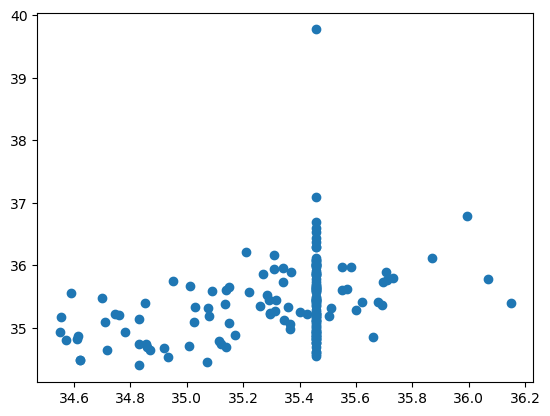

In [7]:
plt.scatter(data2['at_cas_dist_time_avg'],data2['RunTime'])